In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.7.0'

In [ ]:
!pip install tensorflow-hub

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 108 kB 1.1 MB/s            


In [ ]:
!pip install tensorflow-datasets

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 4.0 MB 1.9 MB/s            
     |████████████████████████████████| 48 kB 451 kB/s             
     |████████████████████████████████| 829 kB 9.6 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 86 kB 264 kB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 76 kB 807 kB/s             
     |████████████████████████████████| 129 kB 3.2 MB/s            
     |████████████████████████████████| 207 kB 6.2 MB/s            
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=a3988c17362cbede4a07b33de0d251ca786803ed90fe34c806cb73b8cab7ea84
  Stored in directory: /home/abhisek/snap/jupyter/6/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2b

In [3]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
# Show all the tensorflow datasets
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [5]:
train_data, validation_data, test_data = tfds.load(name='imdb_reviews',
                                                   split=('train[:60%]', 'train[:40%]', 'test'),
                                                  as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLJZQDE/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLJZQDE/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLJZQDE/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


### insight of the dataset

In [6]:
train_data.batch(10)

<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [8]:
train_data_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_data_batch[:4]

<tf.Tensor: shape=(4,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [9]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

### Creating a embed object to check

In [12]:
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim50/2")
embeddings = embed(["cat is on the mat", "dog is in the fog"])
embeddings

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 0.16589954,  0.0254965 ,  0.1574857 ,  0.17688066,  0.02911299,
        -0.03092718,  0.19445257, -0.05709129, -0.08631689, -0.04391516,
         0.13032274,  0.10905275, -0.08515751,  0.01056632, -0.17220995,
        -0.17925954,  0.19556305,  0.0802278 , -0.03247919, -0.49176937,
        -0.07767699, -0.03160921, -0.13952136,  0.05959712,  0.06858718,
         0.22386682, -0.16653948,  0.19412343, -0.05491862,  0.10997339,
        -0.15811177, -0.02576607, -0.07910853, -0.258499  , -0.04206644,
        -0.20052543,  0.1705603 , -0.15314153,  0.0039225 , -0.28694248,
         0.02468278,  0.11069503,  0.03733957,  0.01433943, -0.11048374,
         0.11931834, -0.11552787, -0.11110869,  0.02384969, -0.07074881],
       [ 0.1437864 ,  0.08291595,  0.10897306,  0.04464385, -0.03630389,
        -0.12605834,  0.20263346,  0.12862863, -0.07873426, -0.01195358,
         0.0020956 , -0.03080653, -0.08019945, -0.18797135, -0.11973457,
 

In [13]:
embeddings = embed(['The cat is sitting on the mat', ' The dog is outsite the house'])

In [14]:
embeddings

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 0.22189884,  0.06862637,  0.18972224,  0.19447558,  0.04988718,
         0.00534145,  0.31017092, -0.09333818, -0.09355993, -0.08827309,
         0.18329223,  0.1555122 , -0.02611702,  0.0748767 , -0.24011351,
        -0.22524545,  0.19611254,  0.08292711, -0.13607135, -0.45142505,
        -0.16202533, -0.12644471, -0.13942447,  0.0824626 ,  0.16241442,
         0.18056755, -0.16365142,  0.14530616, -0.00108435,  0.02542196,
        -0.18885332, -0.04405858, -0.1021496 , -0.3334419 , -0.05144535,
        -0.23232494,  0.08993128, -0.06762514,  0.04016877, -0.2927086 ,
         0.03667931,  0.11491733,  0.02451112,  0.05725951, -0.17329185,
         0.04872822, -0.10959121, -0.08153117, -0.02491616, -0.17288873],
       [ 0.18939982, -0.04251897,  0.24448527, -0.01230562,  0.19007154,
        -0.10997721,  0.23669174, -0.06037644, -0.01974247, -0.1340665 ,
         0.07002184,  0.06272577, -0.08221833,  0.0447581 ,  0.02663123,
 

### Making the model

In [16]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                          dtype= tf.string ,trainable=True)
hub_layer(train_data_batch[:2])

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862679,  0.7753425 , -0.07667089,
        -0.15752277,  0.01872335, -0.08169781, -0.3521876 ,  0.4637341 ,
        -0.08492756,  0.07166859, -0.00670817,  0.12686075, -0.19326553,
 

In [17]:
model = Sequential()
model.add(hub_layer)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=5,
                    validation_data=validation_data.batch(512))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


30/30 [==============================] - 20s 623ms/step - loss: 0.7027 - accuracy: 0.5633 - val_loss: 0.6456 - val_accuracy: 0.7060
Epoch 2/5
30/30 [==============================] - 19s 613ms/step - loss: 0.6164 - accuracy: 0.7481 - val_loss: 0.5700 - val_accuracy: 0.8001
Epoch 3/5
30/30 [==============================] - 19s 614ms/step - loss: 0.5201 - accuracy: 0.8222 - val_loss: 0.4480 - val_accuracy: 0.8584
Epoch 4/5
30/30 [==============================] - 19s 614ms/step - loss: 0.3952 - accuracy: 0.8763 - val_loss: 0.3278 - val_accuracy: 0.9019
Epoch 5/5
30/30 [==============================] - 19s 616ms/step - loss: 0.2901 - accuracy: 0.9111 - val_loss: 0.2418 - val_accuracy: 0.9269


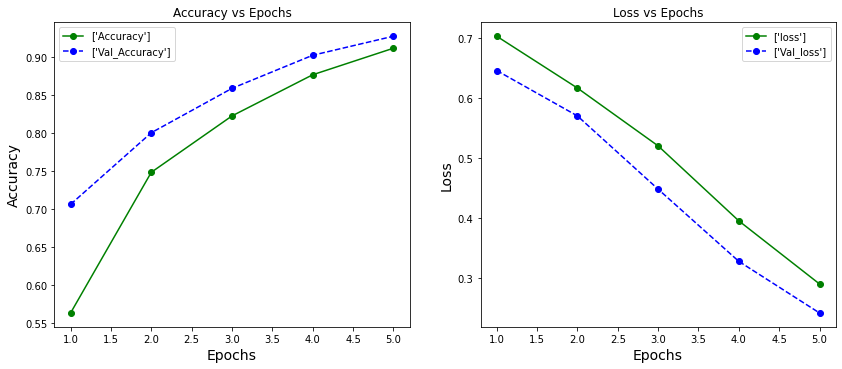

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(14,5.6))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'go-', label=['Accuracy'])
plt.plot(epochs, val_acc, 'bo--', label=['Val_Accuracy'])
plt.legend()
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go-', label=['loss'])
plt.plot(epochs, val_loss, 'bo--', label=['Val_loss'])
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

plt.show()

In [24]:
model.evaluate(test_data.batch(512))

49/49 [==============================] - 5s 102ms/step - loss: 0.3558 - accuracy: 0.8517


[0.35583674907684326, 0.8516799807548523]